In [1]:
pwd

'/Users/macbookair'

In [2]:

%cd "/Users/macbookair/Desktop/DS360/Case Studies/Python/Python Foundation Case Study 1 - Retail Case Study"

/Users/macbookair/Desktop/DS360/Case Studies/Python/Python Foundation Case Study 1 - Retail Case Study


In [3]:
import pandas as pd
import numpy as np
import datetime as dt

In [4]:
customer = pd.read_csv('Customer.csv')
prodcat = pd.read_csv('prod_cat_info.csv')
trns = pd.read_csv('transactions.csv')

In [5]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [6]:
customer.shape

(5647, 4)

In [7]:
prodcat.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [8]:
prodcat.shape

(23, 4)

In [9]:
trns.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,8410316370,266783,20/02/13,4,1,1,869,91.245,960.245,e-Shop
1,16999552161,266783,09/02/13,10,5,2,835,175.350,1845.350,e-Shop
2,98477711300,266783,21/10/12,4,1,3,93,29.295,308.295,TeleShop
3,25890929042,266783,24/09/11,1,2,-4,-1321,554.820,-5838.820,e-Shop
4,25890929042,266783,23/09/11,1,2,4,1321,554.820,5838.820,e-Shop


In [10]:
trns.shape

(23053, 10)

#1.Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [11]:
Customer_Final = pd.merge(customer,trns,how = 'inner',left_on = 'customer_Id',right_on = 'cust_id').merge(prodcat,how = 'inner',left_on = ['prod_cat_code','prod_subcat_code'], right_on = ['prod_cat_code','prod_sub_cat_code'])
Customer_Final.drop(labels = ['cust_id','prod_cat_code','prod_subcat_code','prod_sub_cat_code'],axis = 1,inplace = True)

Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13/01/14,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25/03/11,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23/05/11,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,09/12/13,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23/05/13,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [12]:
Customer_Final.shape

(23053, 13)

In [13]:
Customer_Final.isnull().sum()

customer_Id       0
DOB               0
Gender            9
city_code         8
transaction_id    0
tran_date         0
Qty               0
Rate              0
Tax               0
total_amt         0
Store_type        0
prod_cat          0
prod_subcat       0
dtype: int64

In [14]:
Customer_Final.duplicated

<bound method DataFrame.duplicated of        customer_Id         DOB Gender  city_code  transaction_id tran_date  \
0           268408  02-01-1970      M        4.0     87243835584  13/01/14   
1           275152  16-01-1970      M        4.0     73109425404  25/03/11   
2           275034  18-01-1970      F        4.0     64777271023  23/05/11   
3           270829  22-01-1970      F        8.0     87174343938  09/12/13   
4           267657  29-01-1970      F        7.0     76242744953  23/05/13   
...            ...         ...    ...        ...             ...       ...   
23048       267812  04-12-1992      F        1.0     63540378797  10/10/12   
23049       274618  09-12-1992      F        7.0     71793203305  17/08/13   
23050       268097  15-12-1992      F        7.0     91217108818  01/02/12   
23051       268097  15-12-1992      F        7.0     90114483354  31/01/11   
23052       268097  15-12-1992      F        7.0     90114483354  26/01/11   

       Qty  Rate      Tax

In [15]:
Customer_Final.dtypes

customer_Id         int64
DOB                object
Gender             object
city_code         float64
transaction_id      int64
tran_date          object
Qty                 int64
Rate                int64
Tax               float64
total_amt         float64
Store_type         object
prod_cat           object
prod_subcat        object
dtype: object

In [16]:
#Converting DOB and transaction date to date  time
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB,format = '%d-%m-%Y')
Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date,format = '%d/%m/%y')

In [17]:
#Converting city code to object and Rate and Quantity to float

Customer_Final = Customer_Final.astype({'city_code':object,'Qty':float,'Rate':float})

In [18]:
Customer_Final.dtypes

customer_Id                int64
DOB               datetime64[ns]
Gender                    object
city_code                 object
transaction_id             int64
tran_date         datetime64[ns]
Qty                      float64
Rate                     float64
Tax                      float64
total_amt                float64
Store_type                object
prod_cat                  object
prod_subcat               object
dtype: object

In [19]:
#c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [20]:
Customer_Final.loc[:,Customer_Final.dtypes == 'float'].describe()

,Qty,Rate,Tax,total_amt
count,23053.000000,23053.000000,23053.000000,23053.000000
mean,2.432395,636.369713,248.667192,2107.308002
std,2.268406,622.363498,187.177773,2507.561264
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1754.740000
75%,4.000000,1109.000000,365.715000,3569.150000
max,5.000000,1500.000000,787.500000,8287.500000


In [21]:
Customer_Final.loc[:,Customer_Final.dtypes == 'object'].describe()

,Gender,city_code,Store_type,prod_cat,prod_subcat
count,23044,23045.0,23053,23053,23053
unique,2,10.0,4,6,18
top,M,4.0,e-Shop,Books,Women
freq,11811,2422.0,9311,6069,3048


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline


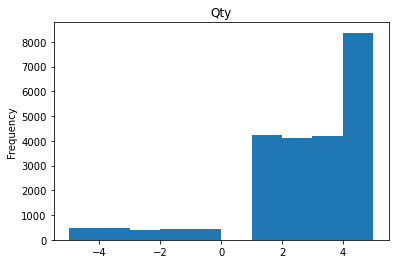

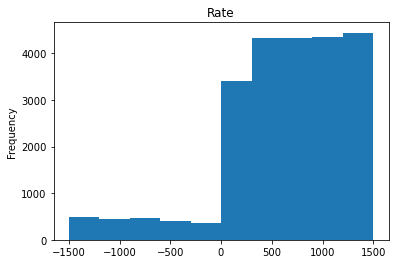

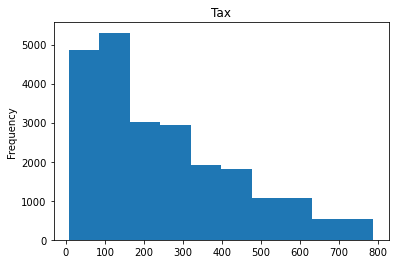

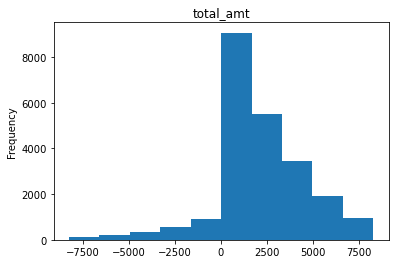

In [23]:
continuos = Customer_Final.loc[:,Customer_Final.dtypes == 'float']
for i in continuos.columns:
    continuos[i].plot(kind = 'hist')
    plt.title(i)
    plt.show()


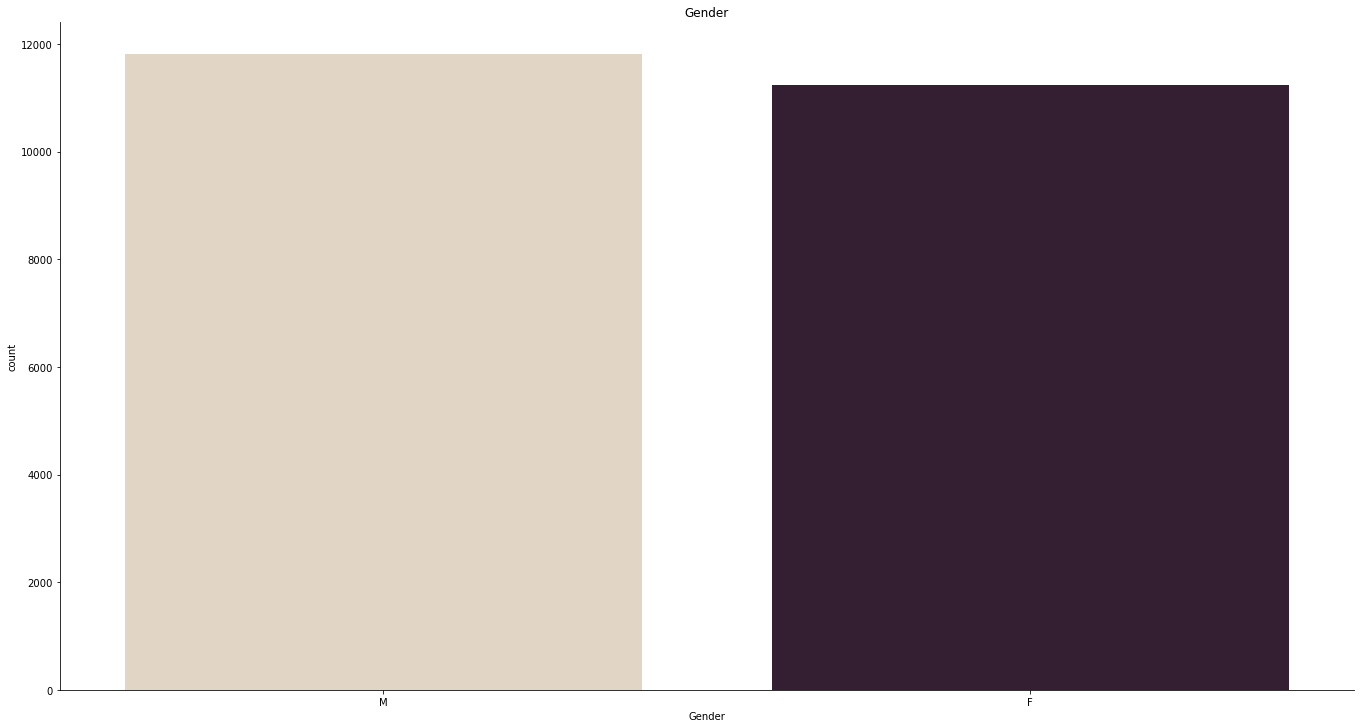

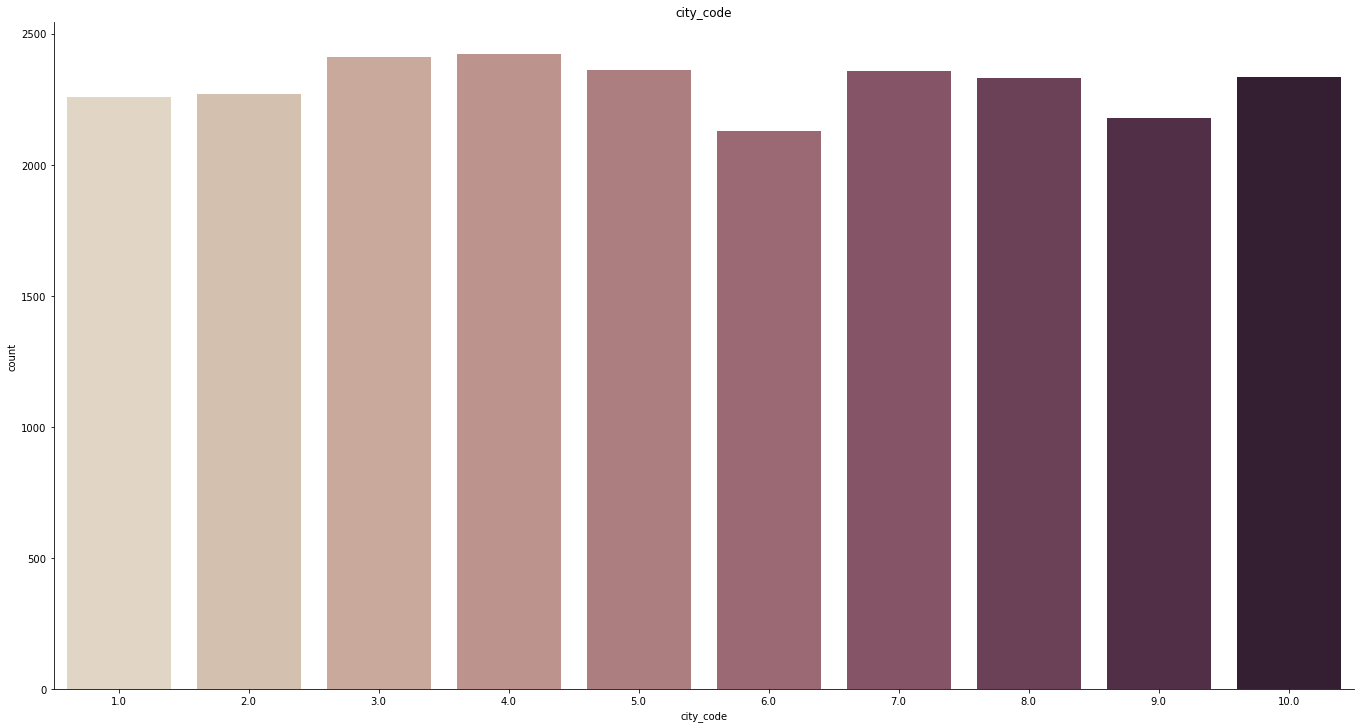

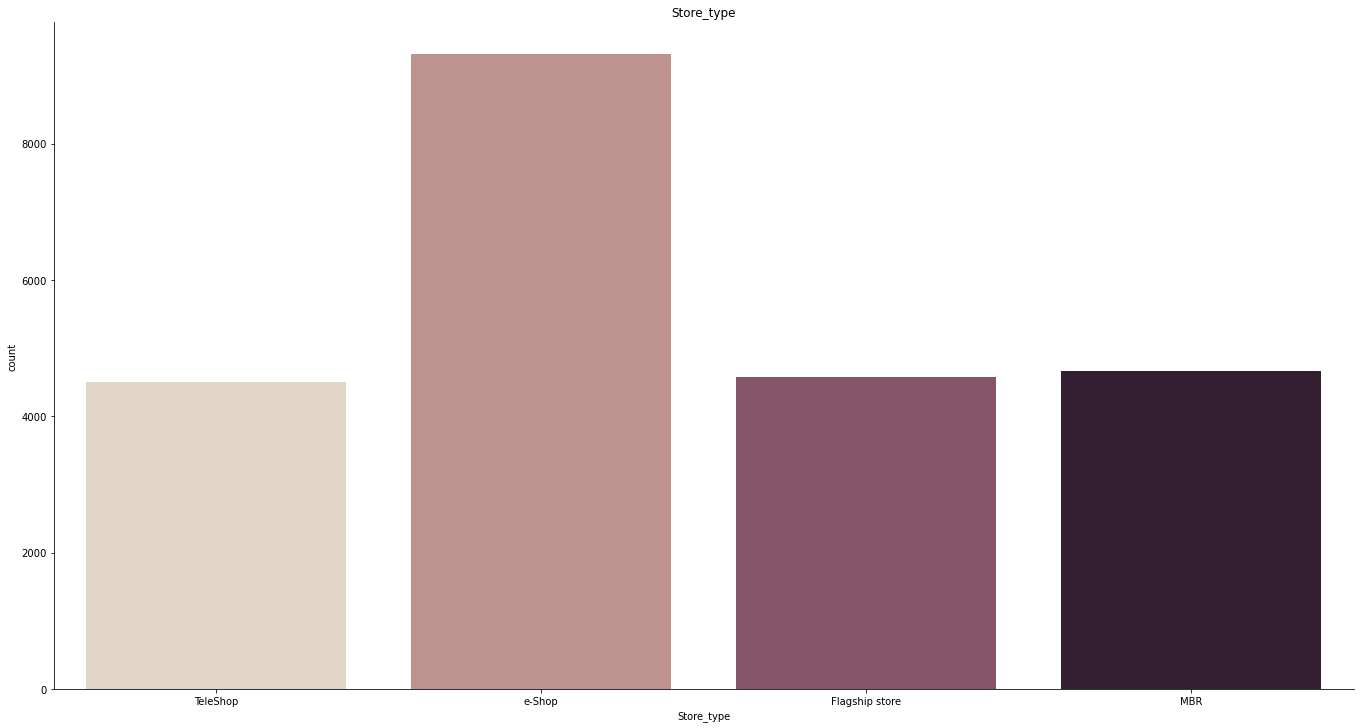

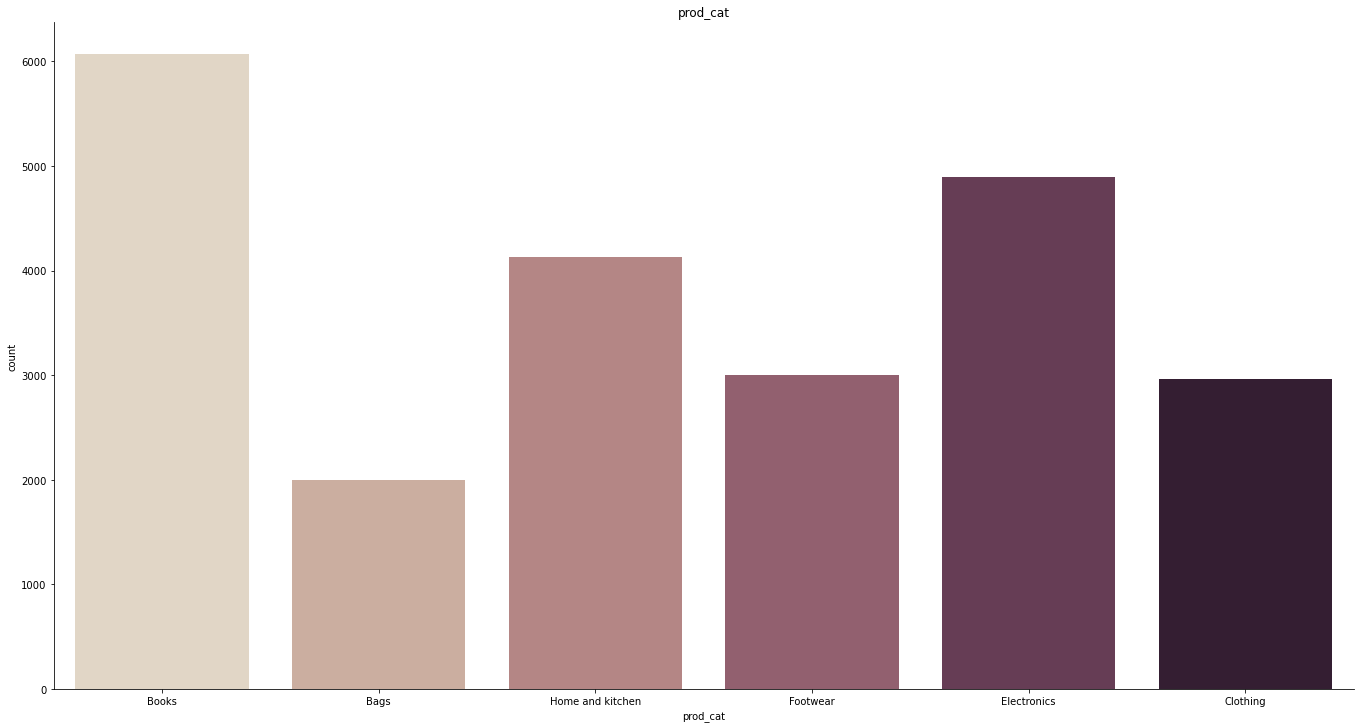

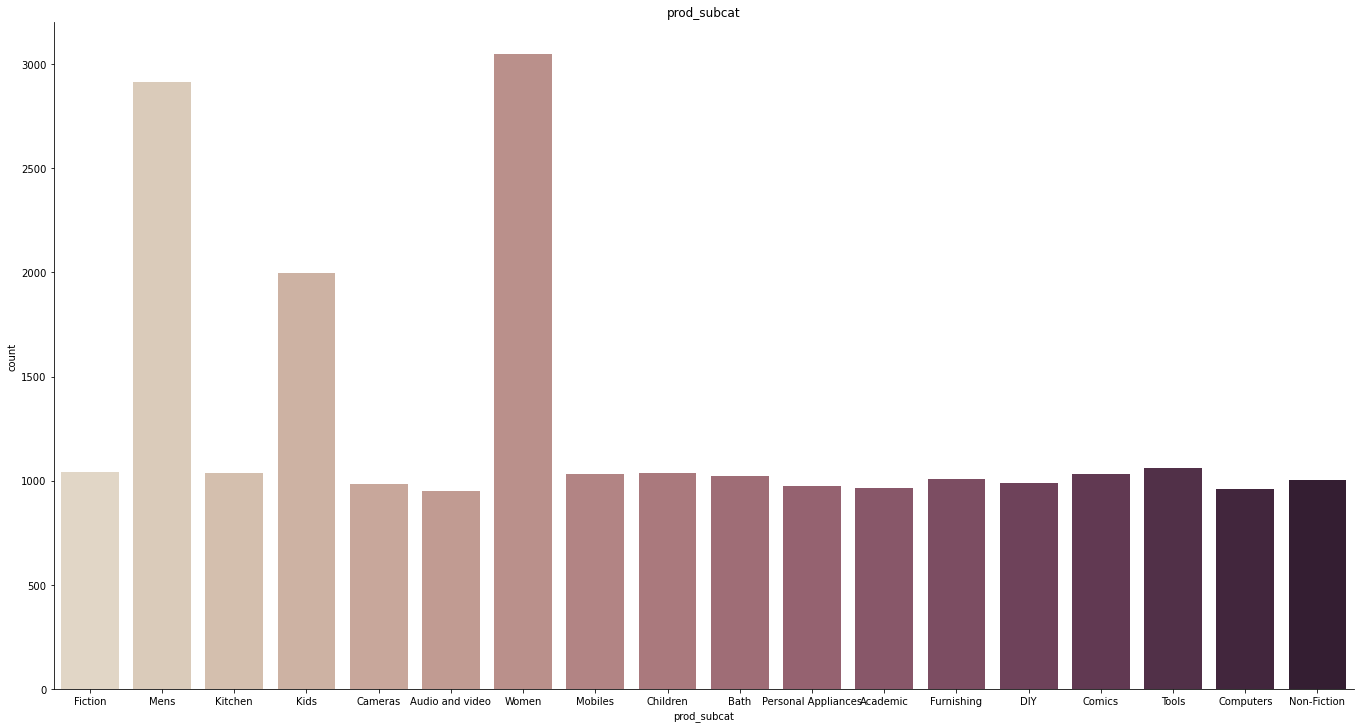

In [24]:
category = Customer_Final.loc[:,Customer_Final.dtypes == 'object']

for i in category.columns :
    sns.catplot(x = i,kind="count",height=10,aspect =1.9, palette="ch:.26", data=category,orient = "v" )
    plt.title(i)
    plt.show()


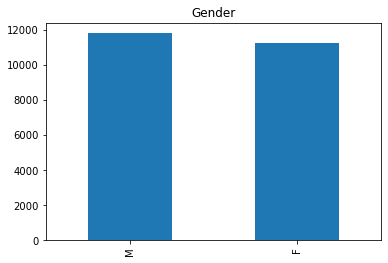

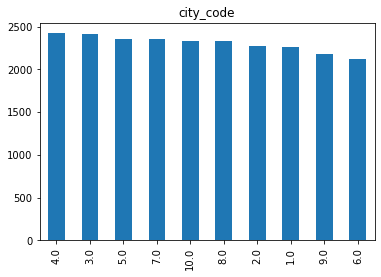

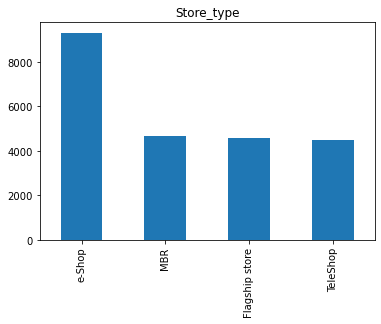

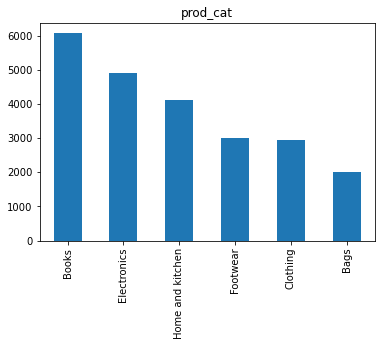

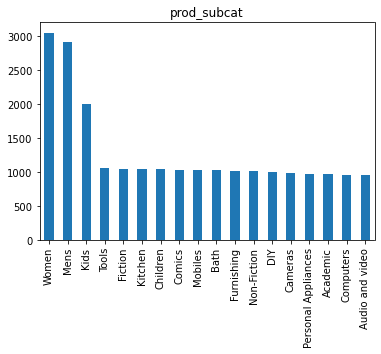

In [25]:
category = Customer_Final.loc[:,Customer_Final.dtypes == 'object']

for i in category.columns :
    category[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

In [26]:
str(Customer_Final.tran_date.max()-Customer_Final.tran_date.min())

'1130 days 00:00:00'

In [27]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,2014-01-13,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,2.0,464.0,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,2.0,197.0,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-12-09,4.0,1141.0,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,4.0,1020.0,428.400,4508.400,e-Shop,Books,Fiction


In [28]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,2014-01-13,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,2.0,464.0,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,2.0,197.0,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-12-09,4.0,1141.0,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,4.0,1020.0,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-12-04,F,1.0,63540378797,2012-10-10,3.0,224.0,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-12-09,F,7.0,71793203305,2013-08-17,4.0,691.0,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,2012-02-01,2.0,411.0,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,2011-01-31,-4.0,-1408.0,591.360,-6223.360,e-Shop,Books,Non-Fiction


In [29]:
#5.Analyze which product categories are more popular among females vs male customers.

#Popular products based on total_amt

pd.pivot_table(data = Customer_Final, index= ['Gender','prod_cat'],values= 'total_amt', aggfunc = 'sum').reset_index().sort_values(by=['Gender','total_amt'],ascending = [True,False])


,Gender,prod_cat,total_amt
1,F,Books,6164692.235
3,F,Electronics,5019354.210
5,F,Home and kitchen,4132177.335
4,F,Footwear,3202552.990
2,F,Clothing,3026750.805
0,F,Bags,2077985.650
7,M,Books,6645972.775
9,M,Electronics,5703109.425
11,M,Home and kitchen,4301075.480
8,M,Clothing,3224079.495


In [30]:

pd.pivot_table(data = Customer_Final, index= ['Gender','prod_cat'],values= 'Qty', aggfunc = 'sum').reset_index().sort_values(by=['Gender','Qty'],ascending = [True,False])

,Gender,prod_cat,Qty
1,F,Books,7070.0
3,F,Electronics,5832.0
5,F,Home and kitchen,4895.0
4,F,Footwear,3716.0
2,F,Clothing,3425.0
0,F,Bags,2362.0
7,M,Books,7587.0
9,M,Electronics,6476.0
11,M,Home and kitchen,5041.0
8,M,Clothing,3748.0


In [31]:
#6.Which City code has the maximum customers and what was the percentage of customers from that city?
df=pd.DataFrame(Customer_Final.groupby('city_code').count().customer_Id)
df.rename(columns = {'customer_Id':'Percentage_of_Customers'},inplace=True)
df = df*100/df.sum()
top = df.sort_values(by='Percentage_of_Customers',ascending=False).head(1)
print('city with highest % of customers\n\n',top)


city with highest % of customers

            Percentage_of_Customers
city_code                         
4.0                      10.509872


In [32]:
#or
df = pd.pivot_table(data=Customer_Final,index='city_code',values ='customer_Id',aggfunc = 'count')
top = (df*100/df.sum()).nlargest(columns = 'customer_Id', n=1).rename(columns={'customer_Id':'% of Customers'})
print('city with highest % of customers\n\n',top)

city with highest % of customers

            % of Customers
city_code                
4.0             10.509872


In [33]:
#7.Which store type sells the maximum products by value and by quantity?

In [34]:
top = pd.pivot_table(data=Customer_Final,index='Store_type', values='Qty',aggfunc = 'sum').nlargest(columns='Qty',n=1)

top_rev = pd.pivot_table(data=Customer_Final,index='Store_type', values='total_amt',aggfunc = 'sum').nlargest(columns='total_amt',n=1)

print('Highest selling store\n\n', top,'\n\nHighest earning store\n\n', top_rev)

Highest selling store

                 Qty
Store_type         
e-Shop      22763.0 

Highest earning store

               total_amt
Store_type             
e-Shop      19824816.05


In [35]:
Customer_Final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'tran_date', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat'],
      dtype='object')

In [36]:
#8.8.What was the total amount earned from the "Electronics" and "Clothing" categories from
#Flagship Stores?

x  = pd.pivot_table(data=Customer_Final,index = 'Store_type',columns='prod_cat', 
               values='total_amt',aggfunc='sum').loc['Flagship store',['Clothing','Electronics']].sum()
print('Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores:',x)

Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores: 3409559.27


In [37]:
#9.What was the total amount earned from "Male" customers under the "Electronics" category?
x  = pd.pivot_table(data=Customer_Final,index = 'Gender',columns='prod_cat', 
               values='total_amt',aggfunc='sum').loc['M','Electronics'].sum()
print('Total amount earned from "Male" customers under the "Electronics" category:',x)

Total amount earned from "Male" customers under the "Electronics" category: 5703109.425


In [38]:
# 10 How many customers have more than 10 unique transactions, after removing all transactions
# which have any negative amounts?
df = Customer_Final[Customer_Final.total_amt > 0]
df2 = pd.pivot_table(data=df, index='customer_Id',
                     values='transaction_id', aggfunc=(lambda x: x.count() > 10)).rename(columns={'transaction_id':'Ten_plus_transactions'})

df2[df2.Ten_plus_transactions==True]

,Ten_plus_transactions
customer_Id,
266794,True
270535,True
270803,True
272741,True
273014,True
274227,True


In [39]:
#11. For all customers aged between 25 - 35, find out:
#a. What was the total amount spent for “Electronics” and “Books” product categories?
#b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [40]:
from datetime import timedelta

In [71]:
#a. What was the total amount spent for “Electronics” and “Books” product categories?
Customer_Final['age'] = Customer_Final.tran_date-Customer_Final.DOB
Customer_Final['age'] =  Customer_Final.age/timedelta(days= 365.25)
Customer_Final['age'] = Customer_Final.age.astype(int)
df = Customer_Final[Customer_Final.age.between(25,35)]
df[(df.prod_cat=='Books')|(df.prod_cat=='Electronics')].total_amt.sum()


11197348.435

In [82]:
#b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
begin = dt.datetime(2014,1,1)
end =  dt.datetime(2014,3,1)
df[df.tran_date.between(begin,end)].total_amt.sum()

1072243.38

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_Id     23053 non-null  int64         
 1   DOB             23053 non-null  datetime64[ns]
 2   Gender          23044 non-null  object        
 3   city_code       23045 non-null  object        
 4   transaction_id  23053 non-null  int64         
 5   tran_date       23053 non-null  datetime64[ns]
 6   Qty             23053 non-null  float64       
 7   Rate            23053 non-null  float64       
 8   Tax             23053 non-null  float64       
 9   total_amt       23053 non-null  float64       
 10  Store_type      23053 non-null  object        
 11  prod_cat        23053 non-null  object        
 12  prod_subcat     23053 non-null  object        
 13  age             23053 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
